 <h1><center>House Prices: Predict sales prices and practice feature engineering</center></h1> 





#### Introduction
### Вступление


Пдоготовила: Горшкова Юлия

[**Ссылка на соревнование на платформе kaggle**](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### **Цель:**
*  Цель данного соревнования - предсказание финальной соймости дома.

### **Задачи:**
*  Проанализировать данные и подготовить обучающую выборку
*  Тренировка RF(случайный лес) модели
*  Тренировка XGBoost модели
*  Заключение
 
 
### **Эта работа содерижт в себе следующие подходы и техники:**

* EDA анализ при помощи Pandas и Seaborn
* Кодирование данных
* RF(sklearn) модель
* gridsearchCV(sklearn) для подбора лучих параметров
* gradient boosting(sklearn) модель


## Содержание

* ## **[Вступление](#Introduction)**


* ## **[Подготовка](#Data)**
*   [Описание](#Data)
*   [Imports](#Imports,-Settings)
*   [Полезные функции](#Useful-functions)

* ## **[Исследовательский анализ данных](#Exploratory-Data-Analysis)**
*   [Корреляционный анализ над сырыми данными](#Part1)
*   [Выбросы](#Выбросы)
*   [Обработка пропущенных данных](#Обработка-пропущенных-данных)
*   [Корреляционный анализ над предобработанными данными](#Корреляционный-анализ-над-предобработанными-данными)
*   [Нормализация](#Нормализация)
*   [Вещественные и категориальные признаки](#Вещественные-и-категориальные-признаки)


* ## **[Моделирование и обучение](#Моделирование-и-обучение)**

*   [Разделение на обучающую выборку и целевой признак](#Разделение-на-обучающую-выборку-и-целевой-признак)
*   [Композиции](#Композиции)
*   [Случайный лес](#Scikit-learn-RF-model)
*   [Градиентный бустинг](#Scikit-learn-GBoost-model)

* ## **[Заключение](#Заключение)**




 



#### Data

### **Описание данных**  
79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. You can download the txt file here: [**download**](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

 <html>
<head>
<style>
.myDiv {
  border: 100px outset red;
  background-color: lightblue;
  text-align: center;
}
</style>
</head>
<body>

<div style="overflow:scroll; height:556px;width:1000px;">
  <h2 style="width:100%;height:10%; text-align:center;color:blue;">DESCRIPTION</h2>
  <p>MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
</p>
</div>

</body>
</html>

# Imports, Settings

Imports

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
%matplotlib inline
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from math import sqrt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestRegressor






#### Useful functions


In [ ]:
# целевая переменнная
target = 'SalePrice'
# численные значения
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

#вызвать функцию для кодирования данных для начальных сравнений
#lable_encoding

def lable_encoding(df):
    df = df.fillna(0)
    df_temp = df.astype("str").apply(LabelEncoder().fit_transform)
    df_final = df_temp.where(~df.isna(), df)
    return df_final



#вызвать алгоритм RF(случайный лес) для тренировки на начальных этапах
def train_random_forest(X,y):
    regr = RandomForestRegressor(n_estimators=50,random_state=7,n_jobs=1)
    regr.fit(X,y)
    # lets make prediction on training dataset
    y_train_pred = regr.predict(X)
    rms = (mean_squared_error(y, y_train_pred))
    print("Random Forest Regressor score start: ", rms)

#### **Загружаем данные**

In [ ]:
#Путь к данным
#ВАЖНО! При локальной работе с данными поменяйте это на местоположение данных на вашей машине

df_train = pd.read_csv("<dataset/ML_Weekly/3/house_price_train.csv>")
df_test = pd.read_csv("<dataset/ML_Weekly/3/house_price_train.csv>", error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 2\nSkipping line 7: expected 1 fields, saw 3\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 21: expected 1 fields, saw 3\nSkipping line 25: expected 1 fields, saw 2\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 43: expected 1 fields, saw 2\nSkipping line 56: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 2\nSkipping line 59: expected 1 fields, saw 2\nSkipping line 62: expected 1 fields, saw 2\nSkipping line 63: expected 1 fields, saw 2\nSkipping line 84: expected 1 fields, saw 2\nSkipping line 85: expected 1 fields, saw 2\nSkipping line 86: expected 1 fields, saw 2\nSkipping line 87: expected 1 fields, saw 2\nSkipping line 88: expected 1 fields, saw 2\nSkipping line 109: expected 1 fields, saw 2\nSkipping line 110: expected 1 fields, saw 2\nSkipping line 111: expected 1 fields, saw 2\nSkipping line 112: expected 1 fields, saw 2\nSkipping line 113: expected 1 fields, saw 2\nSkipping line 117: expected


#### **Exploratory Data Analysis**
## **Исследовательский анализ данных**

### shape, info, head and describe

In [ ]:
print(df_train.shape)
print("*"*50)
print(df_test.shape)

(1460, 81)
**************************************************
(1651, 1)


In [ ]:
print(df_train.info())
print("*"*50)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

df train has 81 columns (79 features + id and target SalePrice) and 1460 entries (number of rows or house sales)  
df test has 80 columns (79 features + id) and 1459 entries  


In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
#категориальный
df_train["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [ ]:
#вещественный
df_train["LotArea"].value_counts()

7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

In [ ]:
#вещественный
df_train["YearBuilt"].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [ ]:
df_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [ ]:
#As of pandas starts v15.0
df_train.select_dtypes(include=numerics).describe(include = 'all')

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
df_train.select_dtypes(include="object").describe(include = 'all')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [ ]:
print("SHAPE",df_train.shape)
print("EMPTY",df_train["Alley"].isnull().sum())
df_train["Alley"].describe()

SHAPE (1460, 81)
EMPTY 1369


count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [ ]:
df_test.head()

<!DOCTYPE html>
0                                   <html lang="en">
1                                             <head>
2                             <meta charset="utf-8">
3    <meta name="google-site-verification" conten...
4    <title>Meet Google Drive – One place for all...

In [ ]:
df_test.describe()

<!DOCTYPE html>
count             1651
unique             907
top                  }
freq               158

### Обучим модель случайного леса на сырых данных

In [ ]:
%%time
#вызываем метод кодирования данных 
df_raw = lable_encoding(df_train)

#вызываем метод обучающий случайный лес 

train_random_forest( df_raw.drop('SalePrice', axis=1), np.ravel(np.array(df_raw[['SalePrice']])))

##### Part1
### Корреляционный анализ над сырыми данными

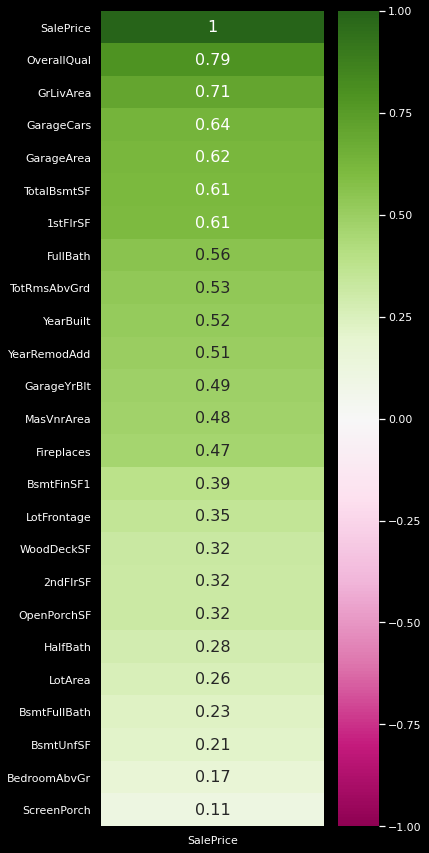

In [ ]:
plt.style.use('dark_background')
corr1_new_train=df_train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr1_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(25),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sns.set(font_scale=2)


* **[Корреляционный анализ с предобработанными данными](#Part2)** 

### Выбросы

В документации к данным, автор реккомендует обратитьо внимание на GrLivArea(Надземная жилая площадь в квадратных футах) “I would recommend removing any houses with more than 4000 square feet from the data set .”
http://jse.amstat.org/v19n3/decock.pdf


GrLivArea: Above grade (ground) living area square feet

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [ ]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Обучим модель случайного леса на данных без выбросов

In [ ]:
%%time
#вызываем метод кодирования данных 
df_raw = lable_encoding(df_train)

#вызываем метод обучающий случайный лес 

train_random_forest( df_raw.drop('SalePrice', axis=1), np.ravel(np.array(df_raw[['SalePrice']])))

Random Forest Regressor score start:  2267.494083013699
CPU times: user 1.49 s, sys: 2.2 ms, total: 1.49 s
Wall time: 1.51 s


### Обработка пропущенных данных

In [ ]:
def get_missed_info():
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool


MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		

In [ ]:
messed_info = get_missed_info()
messed_info.head(25)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000
YearRemodAdd      0  0.000000
MSSubClass        0  0.000000
Foundation        0  0.000000
ExterCond         0  0.000000
ExterQual         0  0.000000

In [ ]:
df_train["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
#получаем все численные значения
def get_columns():
    cols = df_train.columns
    num_cols = df_train._get_numeric_data().columns
    return cols, num_cols

In [ ]:
print("Numerical columns \n \n", get_columns()[1])

print(" \n Categorical columns \n \n", list(set(get_columns()[0]) - set(get_columns()[1])))

Numerical columns 
 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
 
 Categorical columns 
 
 ['Condition1', 'LotShape', 'Functional', 'MSZoning', 'GarageCond', 'BsmtFinType2', 'SaleType', 'MasVnrType', 'RoofMatl', 'PavedDrive', 'BsmtFinType1', 'Neighborhood', 'Exterior1st', 'Utilities', 'KitchenQual', 'FireplaceQu', 'PoolQC', 'MiscFeature', 'GarageQual', 'HouseStyle', 'Exterior2nd', 'HeatingQC', 'SaleCondition', 'CentralAir', 'RoofStyle', 'El

In [ ]:
categorical = list(set(get_columns()[0]) - set(get_columns()[1]))

numerical = get_columns()[1]

In [ ]:
list_missed_columns = list(set(messed_info[messed_info["Total"] >  0].index))
print(list_missed_columns)
print(len(list_missed_columns))
list_missed_columns_categorical = set(categorical) & set(list_missed_columns)
len(list_missed_columns_categorical)

['GarageType', 'Electrical', 'Alley', 'FireplaceQu', 'PoolQC', 'MiscFeature', 'GarageCond', 'GarageQual', 'GarageYrBlt', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'GarageFinish', 'Fence', 'MasVnrArea', 'LotFrontage', 'BsmtQual', 'MasVnrType', 'BsmtFinType1']
19


16

In [ ]:
# replace 'NaN' with 'None' in these columns
for column in list_missed_columns_categorical:
    df_train[column].fillna('None',inplace=True)
    

In [ ]:
messed_info = get_missed_info()
messed_info.head(5)

Total   Percent
LotFrontage    259  0.177397
GarageYrBlt     81  0.055479
MasVnrArea       8  0.005479
SalePrice        0  0.000000
ExterCond        0  0.000000

In [ ]:
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea
df_train.fillna(df_train.median(), inplace=True)
df_test.fillna(df_test.median(), inplace=True)

### Обучим модель случайного леса на данных без пропусков

In [ ]:
%%time
#вызываем метод кодирования данных 
df_raw = lable_encoding(df_train)

#вызываем метод обучающий случайный лес 

train_random_forest( df_raw.drop('SalePrice', axis=1), np.ravel(np.array(df_raw[['SalePrice']])))

Random Forest Regressor score start:  2282.8605835616436
CPU times: user 1.5 s, sys: 2.63 ms, total: 1.5 s
Wall time: 1.51 s


Random Forest Regressor score previous :  2267.494083013699

 <html>
<head>
<style>
.myDiv {
  border: 100px outset red;
  background-color: lightblue;
  text-align: center;
}
</style>
</head>
<body>

<div style="overflow:scroll; height:400px;width:1000px;">
  <h2 style="width:100%;height:10%; text-align:center;color:Slimy Green;">Попробуйте заполнить пропущенные числове значения средними, как на примере выше</h2>
  <p style="font-style: italic"></p>
    <img src="https://storage.googleapis.com/sales.appinst.io/2018/02/boo-hacker.gif" alt="alternatetext" style="float:left;width:300px;height:250px;">
    
</div>

</body>
</html>

In [ ]:
# Put your code here


In [ ]:
messed_info = get_missed_info()
messed_info.head(5)

Total  Percent
SalePrice        0      0.0
Heating          0      0.0
RoofStyle        0      0.0
RoofMatl         0      0.0
Exterior1st      0      0.0

In [ ]:
df_train.isnull().sum().sum()

0

 <html>
<head>
<style>
.myDiv {
  border: 100px outset red;
  background-color: lightblue;
  text-align: center;
}
</style>
</head>
<body>

<div style="overflow:scroll; height:400px;width:1000px;">
  <h2 style="width:100%;height:10%; text-align:center;color:Slimy Green;">Заполните тестовые данные как на примере выше</h2>
  <p style="font-style: italic"></p>
    <img src="https://storage.googleapis.com/sales.appinst.io/2018/02/boo-hacker.gif" alt="alternatetext" style="float:left;width:300px;height:250px;">
    
</div>

</body>
</html>

In [ ]:
#Put your code here



### Корреляционный анализ над предобработанными данными

In [ ]:
sns.scatterplot(x='YearBuilt', y="SalePrice", data=df_train)

In [ ]:
sns.boxplot(x='OverallQual', y="SalePrice", data=df_train)

In [ ]:
sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=df_train)

Корреляция (от лат. correlatio), корреляционная зависимость — взаимозависимость  двух или нескольких случайных величин. Суть ее заключается в том, что при изменении значения одной переменной происходит закономерное изменение (уменьшению или увеличению) другой(-их) переменной(-ых).


При расчете корреляций пытаются определить, существует ли статистически достоверная связь между двумя или несколькими переменными в одной или нескольких вывборках. Например, взаимосвязь между ростом и весом детей, взаимосвязь между успеваемостью и результатами выполнения теста IQ, между стажем работы и производительностью труда.

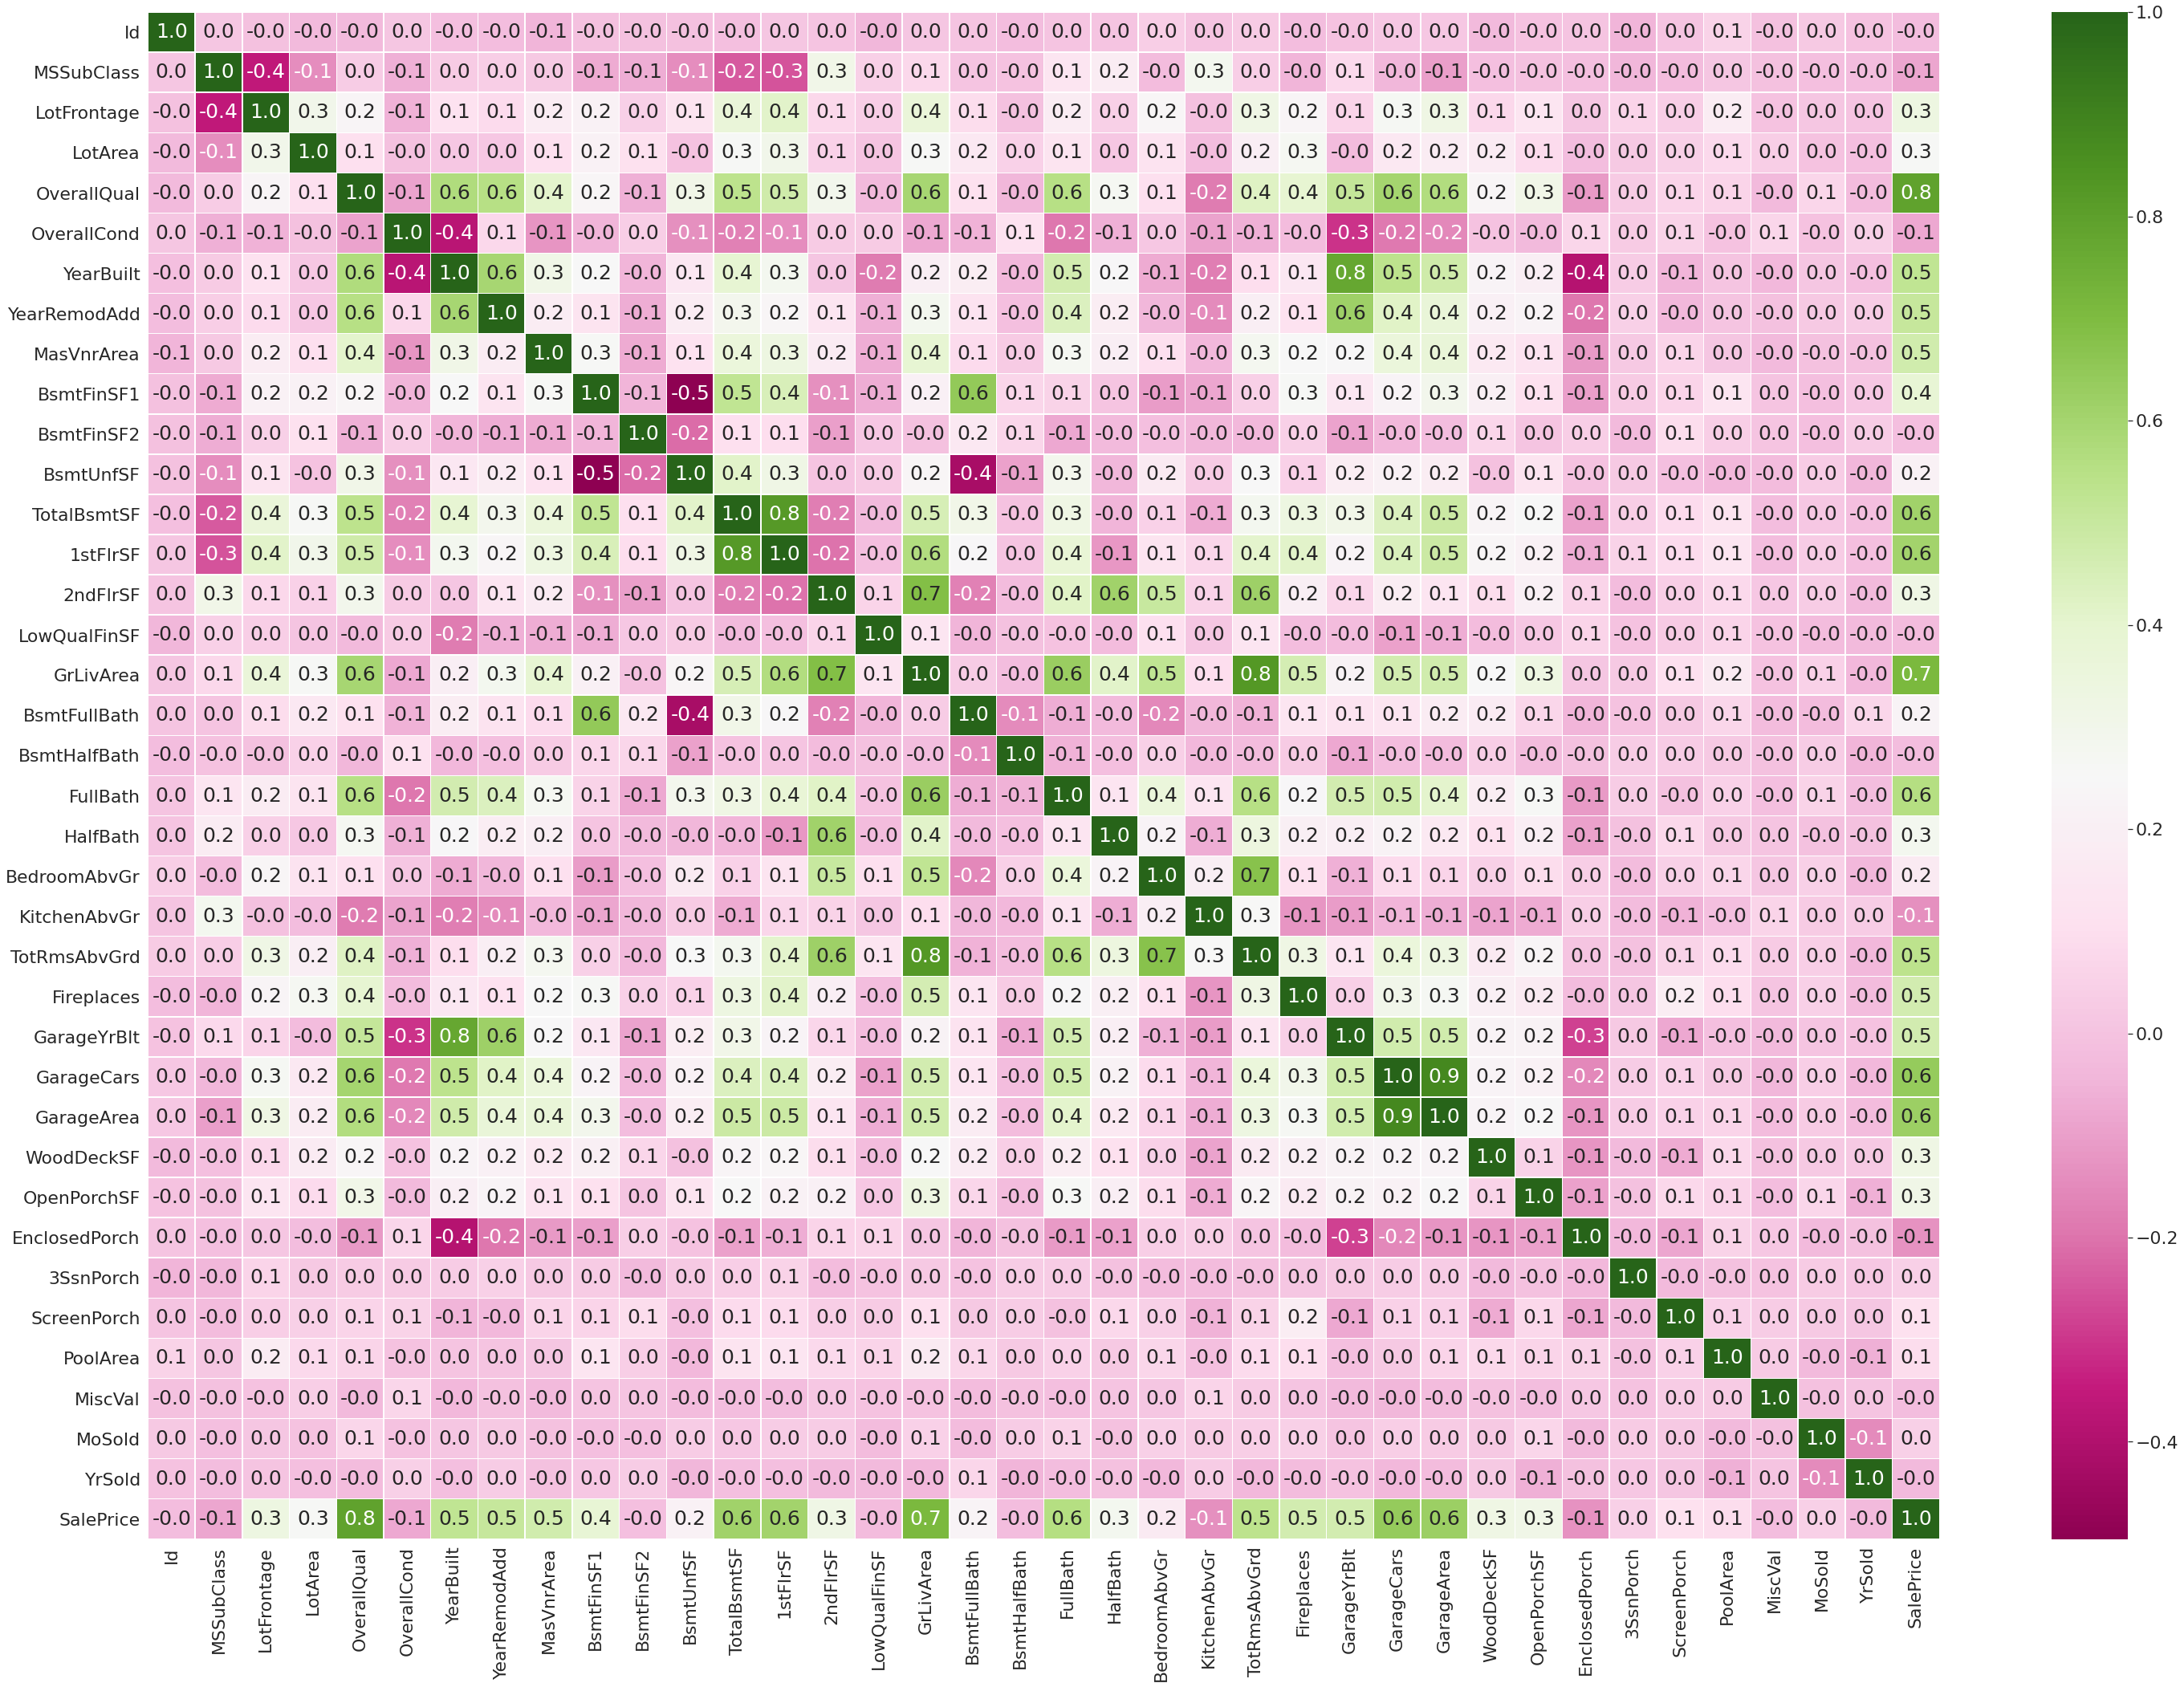

In [ ]:
correlation_train=df_train.corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

Как и предполагалось ранее, площадь собственности, комнат сада и др, а так же год постройки имют высокий коэффицент корелляции с нашими данными.

In [ ]:
corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.1) & (value<0.9)) | (value<=-0.1):
        important_columns.append(key)
important_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'GarageYrBlt',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'KitchenAbvGr']

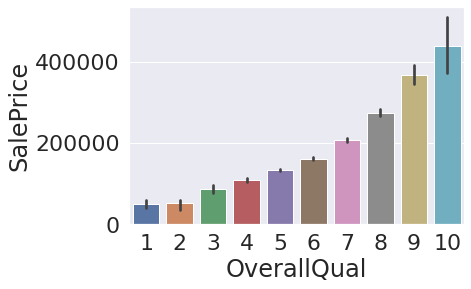

In [ ]:
sns.barplot(df_train["OverallQual"],df_train["SalePrice"]);

OverallQual: Оценивает общеее состояние материала и внешню составляющюю дома в целом

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

### Part2
### Корреляционный анализ с предобработанными данными

In [ ]:
plt.style.use('dark_background')
corr2_new_train=df_train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr2_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(25),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sns.set(font_scale=2)

Корреляция возросла после манипуляции с данными
* **[Корреляционный анализ над сырыми данными](#Part1)** 

### Нормализация

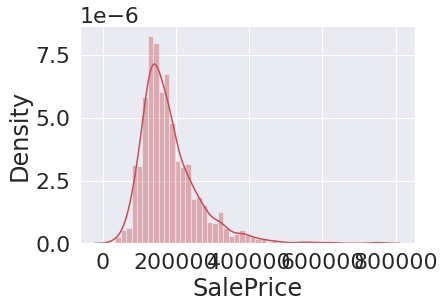

In [ ]:
sns.set_color_codes()
sns.distplot(df_train['SalePrice'], color="r");

SalePrice is not normally distributed.  
This can reduce the performance of the ML regression models 

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

sns.distplot(df_train['SalePrice']);

In [ ]:
%%time
#вызываем метод кодирования данных 
df_raw = lable_encoding(df_train)

#вызываем метод обучающий случайный лес 

train_random_forest( df_raw.drop('SalePrice', axis=1), np.ravel(np.array(df_raw[['SalePrice']])))

Random Forest Regressor score start:  507.3379758904109
CPU times: user 1.36 s, sys: 614 µs, total: 1.36 s
Wall time: 1.36 s


Random Forest Regressor score previous : 2267.494083013699

### Вещественные и категориальные признаки

In [ ]:

#MSSubClass=The building class
df_train['MSSubClass'].value_counts()


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [ ]:
#If we do not convert these to categorical, some model may get affect by this as
#model will compare the value 1<5<10

df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)

#тип прилегающей территории
#Changing OverallCond into a categorical variable
df_train['OverallCond'] =df_train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [ ]:
def PerformOneHotEncoding(df,columnsToEncode):
    return pd.get_dummies(df,columns = columnsToEncode)


df_train_dum = PerformOneHotEncoding(df_train,categorical)
df_train_dum.head()

Id MSSubClass  LotFrontage  LotArea  OverallQual OverallCond  YearBuilt  \
0   1         60         65.0     8450            7           5       2003   
1   2         20         80.0     9600            6           8       1976   
2   3         60         68.0    11250            7           5       2001   
3   4         70         60.0     9550            7           5       1915   
4   5         60         84.0    14260            8           5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal MoSold YrSold  \
0              0          0            0         0        0      2   2008   
1              0          0            0         0        0      5   2007   
2              0          0            0         0        0      9   2008   
3            272          0            0         0        0      2   2006   
4              0          0            0         0        0     12   2008   

   SalePrice  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
0  12.247699                  0                 0                1   
1  12.109016                  0                 1                0   
2  12.317171                  0                 0                1   
3  11.849405                  0                 0                1   
4  12.429220                  0                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Condition1_RRNe  Condition1_RRNn  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0                0                0             0             0             0   
1                0                0             0             0             0   
2                0                0             1             0             0   
3                0                0             1             0  

In [ ]:
"""for c in [c for c in df_train_dum.columns if df_train_dum[c].dtype in numerics]:
    df_train_dum[c] = np.log1p(df_train_dum[c])"""

# Моделирование и обучение



### **Разделение на обучающую выборку и целевой признак**

In [ ]:
X =   df_train_dum.drop('SalePrice', axis=1)
y = np.ravel(np.array(df_train_dum[['SalePrice']]))
print(y.shape)

(1460,)


### Композиции

#### Бутстрэп

![image.png](attachment:image.png)

#### Беггинг

![image.png](attachment:image.png)

## Scikit-learn RF model


 <html>
<head>
<style>
.myDiv {
  border: 100px outset red;
  background-color: lightblue;
  text-align: center;
}
</style>
</head>
<body>

<div style="overflow:scroll; height:400px;width:1000px;">
  <h2 style="width:100%;height:10%; text-align:center;color:Slimy Green;">ПЛЮСЫ И МИНУСЫ АЛГОРИТМА RANDOM FOREST</h2>
  <p style="font-style: italic">Tree example</p>
    <img src="https://annalyzin.files.wordpress.com/2016/08/bagging.gif?w=620" alt="alternatetext" style="float:left;width:700px;height:500px;">
    <h3 style="width:100%;height:10%; text-align:center;color:Slimy Green;">Плюсы</h3>
    <p>

— имеет высокую точность предсказания, на большинстве задач будет лучше линейных алгоритмов; точность сравнима с точностью бустинга

— практически не чувствителен к выбросам в данных из-за случайного сэмлирования

— не чувствителен к масштабированию (и вообще к любым монотонным преобразованиям) значений признаков, связано с выбором случайных подпространств

— не требует тщательной настройки параметров, хорошо работает «из коробки». С помощью «тюнинга» параметров можно достичь прироста от 0.5 до 3% точности в зависимости от задачи и данных

— способен эффективно обрабатывать данные с большим числом признаков и классов

— одинаково хорошо обрабатывет как непрерывные, так и дискретные признаки

— редко переобучается, на практике добавление деревьев почти всегда только улучшает композицию, но на валидации, 
после достижения определенного количества деревьев, кривая обучения выходит на асимптоту

— для случайного леса существуют методы оценивания значимости отдельных признаков в модели

— хорошо работает с пропущенными данными; сохраняет хорошую точность, если большая часть данных пропущенна

— предполагает возможность сбалансировать вес каждого класса на всей выборке, либо на подвыборке каждого дерева

— вычисляет близость между парами объектов, которые могут использоваться при кластеризации, обнаружении выбросов или (путем масштабирования) дают интересные представления данных

— возможности, описанные выше, могут быть расширены до неразмеченных данных, что приводит к возможности делать кластеризацию и визуализацию данных, обнаруживать выбросы

— высокая параллелизуемость и масштабируемость.</p>
    <h4 style="width:100%;height:10%; text-align:center;color:Slimy Green;">Минусы</h4>
    <p>

— в отличие от одного дерева, результаты случайного леса сложнее интерпретировать

— нет формальных выводов (p-values), доступных для оценки важности переменных

— алгоритм работает хуже многих линейных методов, когда в выборке очень много разреженных признаков (тексты, Bag of words)

— случайный лес не умеет экстраполировать, в отличие от той же линейной регрессии (но это можно считать и плюсом, так как не будет экстремальных значений в случае попадания выброса)

— алгоритм склонен к переобучению на некоторых задачах, особенно на зашумленных данных

— для данных, включающих категориальные переменные с различным количеством уровней, случайные леса предвзяты в пользу признаков с большим количеством уровней: когда у признака много уровней, дерево будет сильнее подстраиваться именно под эти признаки, так как на них можно получить более высокое значение оптимизируемого функционала (типа прироста информации)

— если данные содержат группы коррелированных признаков, имеющих схожую значимость для меток, то предпочтение отдается небольшим группам перед большими

— больший размер получающихся моделей. Требуется  памяти для хранения модели, где  — число деревьев.</p>
</div>

</body>
</html>

In [ ]:
#RandomForestRegressor?
# If you need to refresh some data about RF, uncomment

    n_estimators — число деревьев в "лесу" (по дефолту – 10)

    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
    
    oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
    random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Количество деревьев в случайных лесу
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Количество признаков, которые следует учитывать при каждом сплите
max_features = ['auto', 'sqrt']
# Максимальное количество уровней в дереве
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
# Минимальное количество выборок, необходимых для каждого листового узла
min_samples_leaf = [1, 2, 4]
# Методика отбора образцов для обучения каждого дерева
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 29.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 466}

In [ ]:
y_pred = rf_random.predict(X)
    
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))

In [ ]:
print("Model score rf_random",rmse)

Model score rf_random 0.029089833935240544


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [60],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [5],
    'n_estimators': [1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,return_train_score = True)

In [ ]:
grid_search.fit(X, y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
y_pred = grid_search.predict(X)
from sklearn import metrics
   
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))

In [ ]:
print("Model score grid search cv",rmse)

Model score grid search cv 0.028925806653691374


## Scikit-learn GBoost model¶

 <html>
<head>
<style>
.myDiv {
  border: 100px outset red;
  background-color: lightblue;
  text-align: center;
}
</style>
</head>
<body>

<div style="overflow:scroll; height:400px;width:1000px;">
  <h2 style="width:100%;height:10%; text-align:center;color:Slimy Green;">GBoost Regressor</h2>
  <p style="font-style: italic"> Example</p>
    <img src="https://uc-r.github.io/public/images/analytics/gbm/boosted_stumps.gif" alt="alternatetext" style="float:left;width:700px;height:500px;">

    
Бустинг — это техника построения ансамблей, в которой предсказатели построены не независимо, а последовательно

Это техника использует идею о том, что следующая модель будет учится на ошибках предыдущей. Они имеют неравную вероятность появления в последующих моделях, и чаще появятся те, что дают наибольшую ошибку. Предсказатели могут быть выбраны из широкого ассортимента моделей, например, деревья решений, регрессия, классификаторы и т.д. Из-за того, что предсказатели обучаются на ошибках, совершенных предыдущими, требуется меньше времени для того, чтобы добраться до реального ответа. Но мы должны выбирать критерий остановки с осторожностью, иначе это может привести к переобучению. Градиентный бустинг — это пример бустинга.

Алгоритм градиентного бустинга
Градиентный бустинг — это техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений.

Цель любого алгоритма обучения с учителем — определить функцию потерь и минимизировать её.
Цель -  итеративно применять паттерны отклонений и улучшать предсказания. Как только мы достигли момента, когда отклонения не имеют никакого паттерна, мы прекращаем достраивать нашу модель (иначе это может привести к переобучению). Алгоритмически, мы минимизируем нашу функцию потерь.

В итоге,

Сначала строим простые модели и анализируем ошибки;
Определяем точки, которые не вписываются в простую модель;
Добавляем модели, которые обрабатывают сложные случаи, которые были выявлены на начальной модели;
Собираем все построенные модели, определяя вес каждого предсказателя.</p>
</div>

</body>
</html>


learning_rate —  коэффициент скорости обучения - параметр, отвечающий за то, насколько изменяются веса.
max_depth — максимальная глубина дерева.
min_samples_split : минимальное число точек, необходимое для разделение. Полезно, чтобы избегать переобучение.
min_samples_leaf : минимальное количество элементов в листе или узле дерева. Меньшие значения следует выбирать для несбалансированных выборок.

max_depth : максимальная глубина дерева. Используется для борьбы с переобучением.
max_lead_nodes : Максимальное число конечных листьев у дерева. Если задан этот гиперпараметр, то предыдущий игнорируется.

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=2000, max_depth=2, learning_rate=0.2)
GBoost.fit(X,y)
score = (GBoost.score(X, y))
predict_xgboost = GBoost.predict(X)
msexgboost = mean_squared_error(y,predict_xgboost)
rmsexgboost= np.sqrt(msexgboost)
print("Gradient Boosting score: \n",msexgboost)

Gradient Boosting score: 
 0.00021165825503456913


In [ ]:
#GradientBoostingRegressor?

## Заключение

 <html>
<head>
<style>
.myDiv {
  border: 100px outset red;
  background-color: lightblue;
  text-align: center;
}
</style>
</head>
<body>

<div style="overflow:scroll; height:400px;width:1000px;">
  <h2 style="width:100%;height:10%; text-align:center;color:Red;">Random Forest vs Gradient Boosting</h2>
  <p style="font-style: italic">...</p>
    <img src="https://cdn.iwastesomuchtime.com/79201719265745248.gif" alt="alternatetext" style="float:left;width:300px;height:250px;">
     <h3 style="width:100%;height:10%; text-align:center;color:Black;">Who is better</h3>
    <p >Random Forest vs Gradient Boosting
        
Как и случайные леса, GBoost представляет собой набор деревьев решений. Два основных отличия:

Как строятся деревья: случайные леса строят каждое дерево независимо, в то время как GBoost строит одно дерево за раз. Эта аддитивная модель (ансамбль) работает поэтапно, вводя слабого ученика для устранения недостатков существующих слабых учеников. Объединение результатов: случайные леса объединяют результаты в конце процесса (путем усреднения или «правил большинства»), в то время как градиентное усиление объединяет результаты на этом пути. Если вы тщательно настроите параметры,GBoost может привести к более высокой производительности, чем случайные леса. ОднакоGBoost может быть не лучшим выбором, если у вас много шума, так как это может привести к переобучению. Также их сложнее настроить, чем случайные леса.

Случайные леса и GBoost - каждый из них лучше всего подходит в разных областях. Случайные леса хорошо подходят для обнаружения мультиклассовых объектов и биоинформатики, которая, как правило, имеет большой статистический шум. Gradient Boosting хорошо работает при несбалансированных данных, например при оценке рисков в реальном времени.</p>
    
</div>

</body>
</html>

 <html>
<head>
<style>
.myDiv {
  border: 100px outset red;
  background-color: lightblue;
  text-align: center;
}
</style>
</head>
<body>

<div style="overflow:scroll; height:400px;width:1000px;">
  <h2 style="width:100%;height:10%; text-align:center;color:Slimy Green;">Попробуйте поиграть с гиперпараметрами моделей RF и GBoost моделей</h2>
  <p style="font-style: italic">
    </p>
    <img src="https://storage.googleapis.com/sales.appinst.io/2018/02/boo-hacker.gif" alt="alternatetext" style="float:left;width:300px;height:250px;">
    
</div>

</body>
</html>

In [ ]:
# put your code here


### Useful Links

##### What is a Box Cox Transformation?

https://www.statisticshowto.com/box-cox-transformation/#:~:text=A%20Box%20Cox%20transformation%20is,a%20broader%20number%20of%20tests.

##### Log-normal transformation.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/#:~:text=The%20log%20transformation%20is%2C%20arguably,normal%20or%20near%20normal%20distribution.

##### About correlation

https://www.surveysystem.com/correlation.htm

##### Decision Trees

https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb#:~:text=A%20decision%20tree%20is%20a%20flowchart%2Dlike%20structure%20in%20which,taken%20after%20computing%20all%20attributes)

##### Understanding Random Forest

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

##### Understanding Gradient Boosting Machines

https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

##### Hyperparameter Tuning the Random Forest in Python

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


##### Hyperparameter tuning in XGBoost

https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f


 <html>
<head>
<style>
.myDiv {
  border: 100px outset red;
  background-color: lightblue;
  text-align: center;
}
</style>
</head>
<body>

<div style="overflow:scroll; height:600px;width:1000px;">
  <h2 style="width:100%;height:10%; text-align:center;color:Slimy Green;">Спасибо за внимание</h2>
  <p style="font-style: italic"></p>
    <img src="https://media0.giphy.com/media/ngzhAbaGP1ovS/200.gif" alt="alternatetext" style="float:left;width:800px;height:570px;">
    
</div>

</body>
</html>